### IMPORTATION DU LIBRAIRIE

In [97]:
# Numpy Library for Numerical Calculations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
nltk.download('stopwords') # Downloading the Stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anthony/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
spam_data = pd.read_csv('spam.csv', encoding='latin1', index_col=None)

In [90]:
print(spam_data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [99]:
# Créer un CountVectorizer pour extraire les mots uniques et leur fréquence
vectorizer = CountVectorizer(stop_words='english')  # On peut ajouter d'autres stopwords si nécessaire

# Appliquer le vectorizer sur les textes
X = vectorizer.fit_transform(spam_data['v2'])

# Créer un DataFrame avec les mots uniques comme colonnes et les comptages comme valeurs
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Ajouter la colonne "target" au nouveau DataFrame
word_counts['target'] = spam_data['v1']

# Sauvegarder le DataFrame résultant dans un nouveau fichier CSV
word_counts.to_csv('mots_compte.csv', index=False)

print("Fichier CSV créé avec succès !")


Fichier CSV créé avec succès !


In [ ]:
spam_data = pd.read_csv('mots_compte.csv', index_col=None, encoding='ISO-8859-1')

# Séparer les caractéristiques (X) et la cible (y)
X = spam_data.drop('target', axis=1)  # 'target' est la colonne contenant "ham" et "spam"
y = spam_data['target']  # La colonne cible (ham, spam)

# Diviser les données en ensembles d'entraînement (80%) et de test (20%), en utilisant la stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Combiner les ensembles X_train et y_train, X_test et y_test
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Sauvegarder les ensembles dans des fichiers CSV
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

print("Les données ont été divisées et sauvegardées dans 'train.csv' et 'test.csv'.")


Les données ont été divisées et sauvegardées dans 'train.csv' et 'test.csv'.


In [100]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Aperçu des données d'entraînement :
   00  000  000pes  008704050406  0089  0121  01223585236  01223585334  \
0   0    0       0             0     0     0            0            0   
1   0    0       0             0     0     0            0            0   
2   0    0       0             0     0     0            0            0   
3   0    0       0             0     0     0            0            0   
4   0    0       0             0     0     0            0            0   

   0125698789  02  ...  Ã»_  Ã»_thanks  Ã»Âªm  Ã»Âªt  Ã»Âªve  Ã»Ã¯  Ã»Ã¯harry  \
0           0   0  ...    0          0      0      0       0     0          0   
1           0   0  ...    0          0      0      0       0     0          0   
2           0   0  ...    0          0      0      0       0     0          0   
3           0   0  ...    0          0      0      0       0     0          0   
4           0   0  ...    0          0      0      0       0     0          0   

   Ã»Ã²  Ã»Ã³well  target  
0   

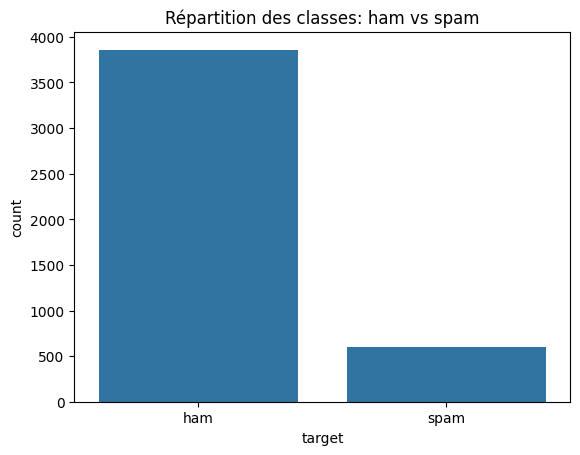


Colonnes des données d'entraînement :
Index(['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236',
       '01223585334', '0125698789', '02',
       ...
       'Ã»_', 'Ã»_thanks', 'Ã»Âªm', 'Ã»Âªt', 'Ã»Âªve', 'Ã»Ã¯', 'Ã»Ã¯harry',
       'Ã»Ã²', 'Ã»Ã³well', 'target'],
      dtype='object', length=8405)

Statistiques sur les comptages de mots dans le train.csv :
                00          000  000pes  008704050406         0089  \
count  4457.000000  4457.000000  4457.0   4457.000000  4457.000000   
mean      0.002244     0.004712     0.0      0.000224     0.000224   
std       0.047319     0.071689     0.0      0.014979     0.014979   
min       0.000000     0.000000     0.0      0.000000     0.000000   
25%       0.000000     0.000000     0.0      0.000000     0.000000   
50%       0.000000     0.000000     0.0      0.000000     0.000000   
75%       0.000000     0.000000     0.0      0.000000     0.000000   
max       1.000000     2.000000     0.0      1.000000     1.00

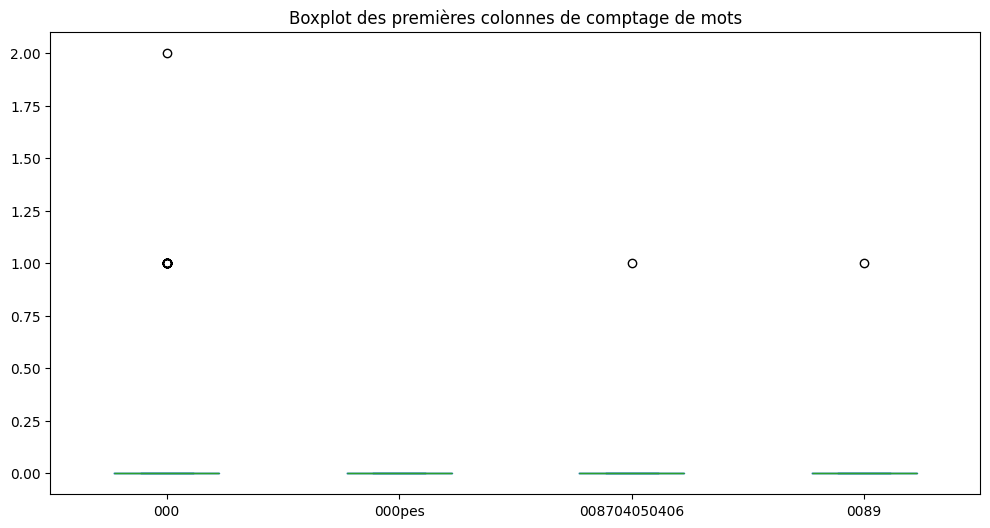

In [101]:
# Aperçu des données d'entraînement et de test
print("Aperçu des données d'entraînement :")
print(train_data.head())

print("\nAperçu des données de test :")
print(test_data.head())

# Vérifier la forme des datasets (nombre de lignes et de colonnes)
print("\nForme des données d'entraînement:", train_data.shape)
print("Forme des données de test:", test_data.shape)

# Vérification des types de données
print("\nTypes de données d'entraînement :")
print(train_data.dtypes)

# Vérification des valeurs manquantes
print("\nValeurs manquantes dans le train.csv :")
print(train_data.isnull().sum())

print("\nValeurs manquantes dans le test.csv :")
print(test_data.isnull().sum())

# Analyser la distribution des classes (ham vs spam)
print("\nDistribution des classes dans le train.csv:")
print(train_data['target'].value_counts())

# Visualisation de la distribution des classes
sns.countplot(x='target', data=train_data)
plt.title('Répartition des classes: ham vs spam')
plt.show()

# Analyser les colonnes de comptage de mots (en supposant que chaque colonne représente un mot compté)
# Nous allons vérifier les premières lignes pour comprendre la structure des données
print("\nColonnes des données d'entraînement :")
print(train_data.columns)

# Analyser quelques statistiques sur les comptages de mots
print("\nStatistiques sur les comptages de mots dans le train.csv :")
print(train_data.describe())

# Visualisation des comptages de mots sous forme de boxplot
train_data.iloc[:, 1:5].plot(kind='box', figsize=(12, 6))  # Boxplot pour les premières colonnes de comptage
plt.title('Boxplot des premières colonnes de comptage de mots')
plt.show()

# Prétraitement : Encodage de la cible (target) en valeurs numériques
label_encoder = LabelEncoder()
train_data['target'] = label_encoder.fit_transform(train_data['target'])
test_data['target'] = label_encoder.transform(test_data['target'])

### les données à entrainner

In [102]:
# Séparer les caractéristiques (X) et la cible (y) pour les deux ensembles
X_train = train_data.drop('target', axis=1)  # Supprimer la colonne 'target' pour les caractéristiques
y_train = train_data['target']  # La colonne cible pour l'entraînement

X_test = test_data.drop('target', axis=1)  # Supprimer la colonne 'target' pour les caractéristiques
y_test = test_data['target']  # La colonne cible pour le test

# Encoder les labels ("spam", "ham") en valeurs numériques (0 et 1)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # encoder les étiquettes d'entraînement
y_test = label_encoder.transform(y_test)  # encoder les étiquettes de test


### En utilisant le naive Bayes comme une modèle

In [103]:
# Initialiser le modèle Naive Bayes
nb = MultinomialNB()

# Entraîner le modèle sur les données d'entraînement
nb.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = nb.predict(X_test)

# Calculer le F1 score
f1 = f1_score(y_test, y_pred)

# Afficher le F1 score
print(f"F1 Score: {f1}")

F1 Score: 0.9311475409836065


### en utilisant le bernuilli naive bayes

In [104]:
# Initialiser le modèle Bernoulli Naive Bayes
bnb = BernoulliNB()

# Entraîner le modèle sur les données d'entraînement
bnb.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = bnb.predict(X_test)

# Calculer le F1 score
f1 = f1_score(y_test, y_pred)

# Afficher le F1 score
print(f"F1 Score (Bernoulli Naive Bayes): {f1}")


F1 Score (Bernoulli Naive Bayes): 0.9175627240143369


### en utilisant le Logistic regression

In [105]:
# Initialiser le modèle de régression logistique
logreg = LogisticRegression(max_iter=1000)

# Entraîner le modèle sur les données d'entraînement
logreg.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = logreg.predict(X_test)

# Calculer le F1 score
f1 = f1_score(y_test, y_pred)

# Afficher le F1 score
print(f"F1 Score (Logistic Regression): {f1}")


F1 Score (Logistic Regression): 0.9044117647058824
